In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

load and check data

In [2]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [3]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


EDA

In [5]:
train_data.shape

(26882, 14)

In [6]:
test_data.shape

(15060, 14)

In [7]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [8]:
train_data = train_data.dropna(axis = 0, how ='any')

<AxesSubplot: >

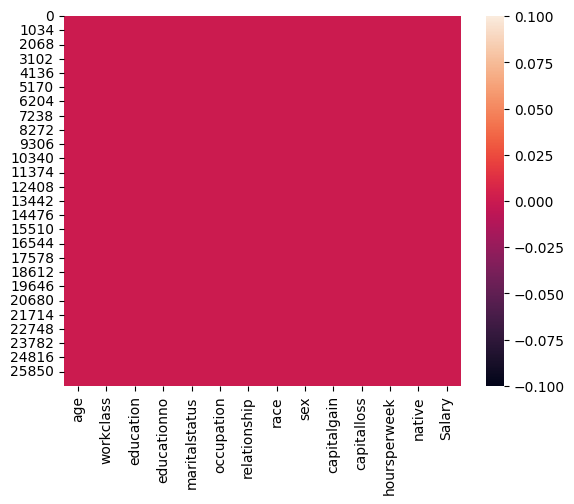

In [9]:
sns.heatmap(train_data.isnull())

<AxesSubplot: >

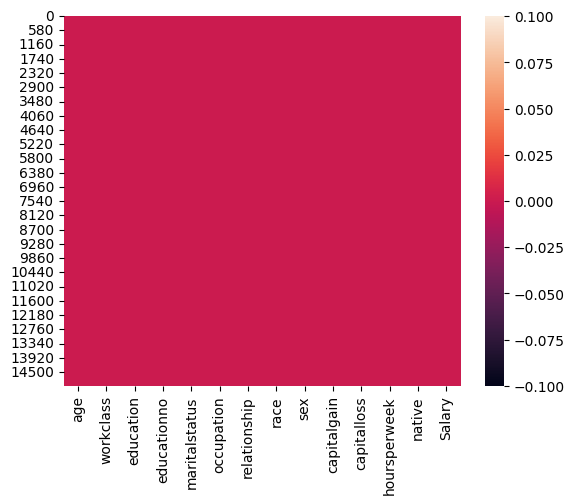

In [10]:
sns.heatmap(test_data.isnull())

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26881 entries, 0 to 26880
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            26881 non-null  int64  
 1   workclass      26881 non-null  object 
 2   education      26881 non-null  object 
 3   educationno    26881 non-null  int64  
 4   maritalstatus  26881 non-null  object 
 5   occupation     26881 non-null  object 
 6   relationship   26881 non-null  object 
 7   race           26881 non-null  object 
 8   sex            26881 non-null  object 
 9   capitalgain    26881 non-null  float64
 10  capitalloss    26881 non-null  float64
 11  hoursperweek   26881 non-null  float64
 12  native         26881 non-null  object 
 13  Salary         26881 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.1+ MB


In [12]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [13]:
num_columns = ['age','capitalgain','capitalloss', 'hoursperweek']
cat_columns = ['workclass', 'education', 'educationno','maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native', 'Salary']

In [14]:
train_data['maritalstatus'].value_counts()

 Married-civ-spouse       12503
 Never-married             8665
 Divorced                  3758
 Separated                  850
 Widowed                    753
 Married-spouse-absent      333
 Married-AF-spouse           19
Name: maritalstatus, dtype: int64

In [15]:
train_data['race'].value_counts()

 White                 23097
 Black                  2519
 Asian-Pac-Islander      797
 Amer-Indian-Eskimo      257
 Other                   211
Name: race, dtype: int64

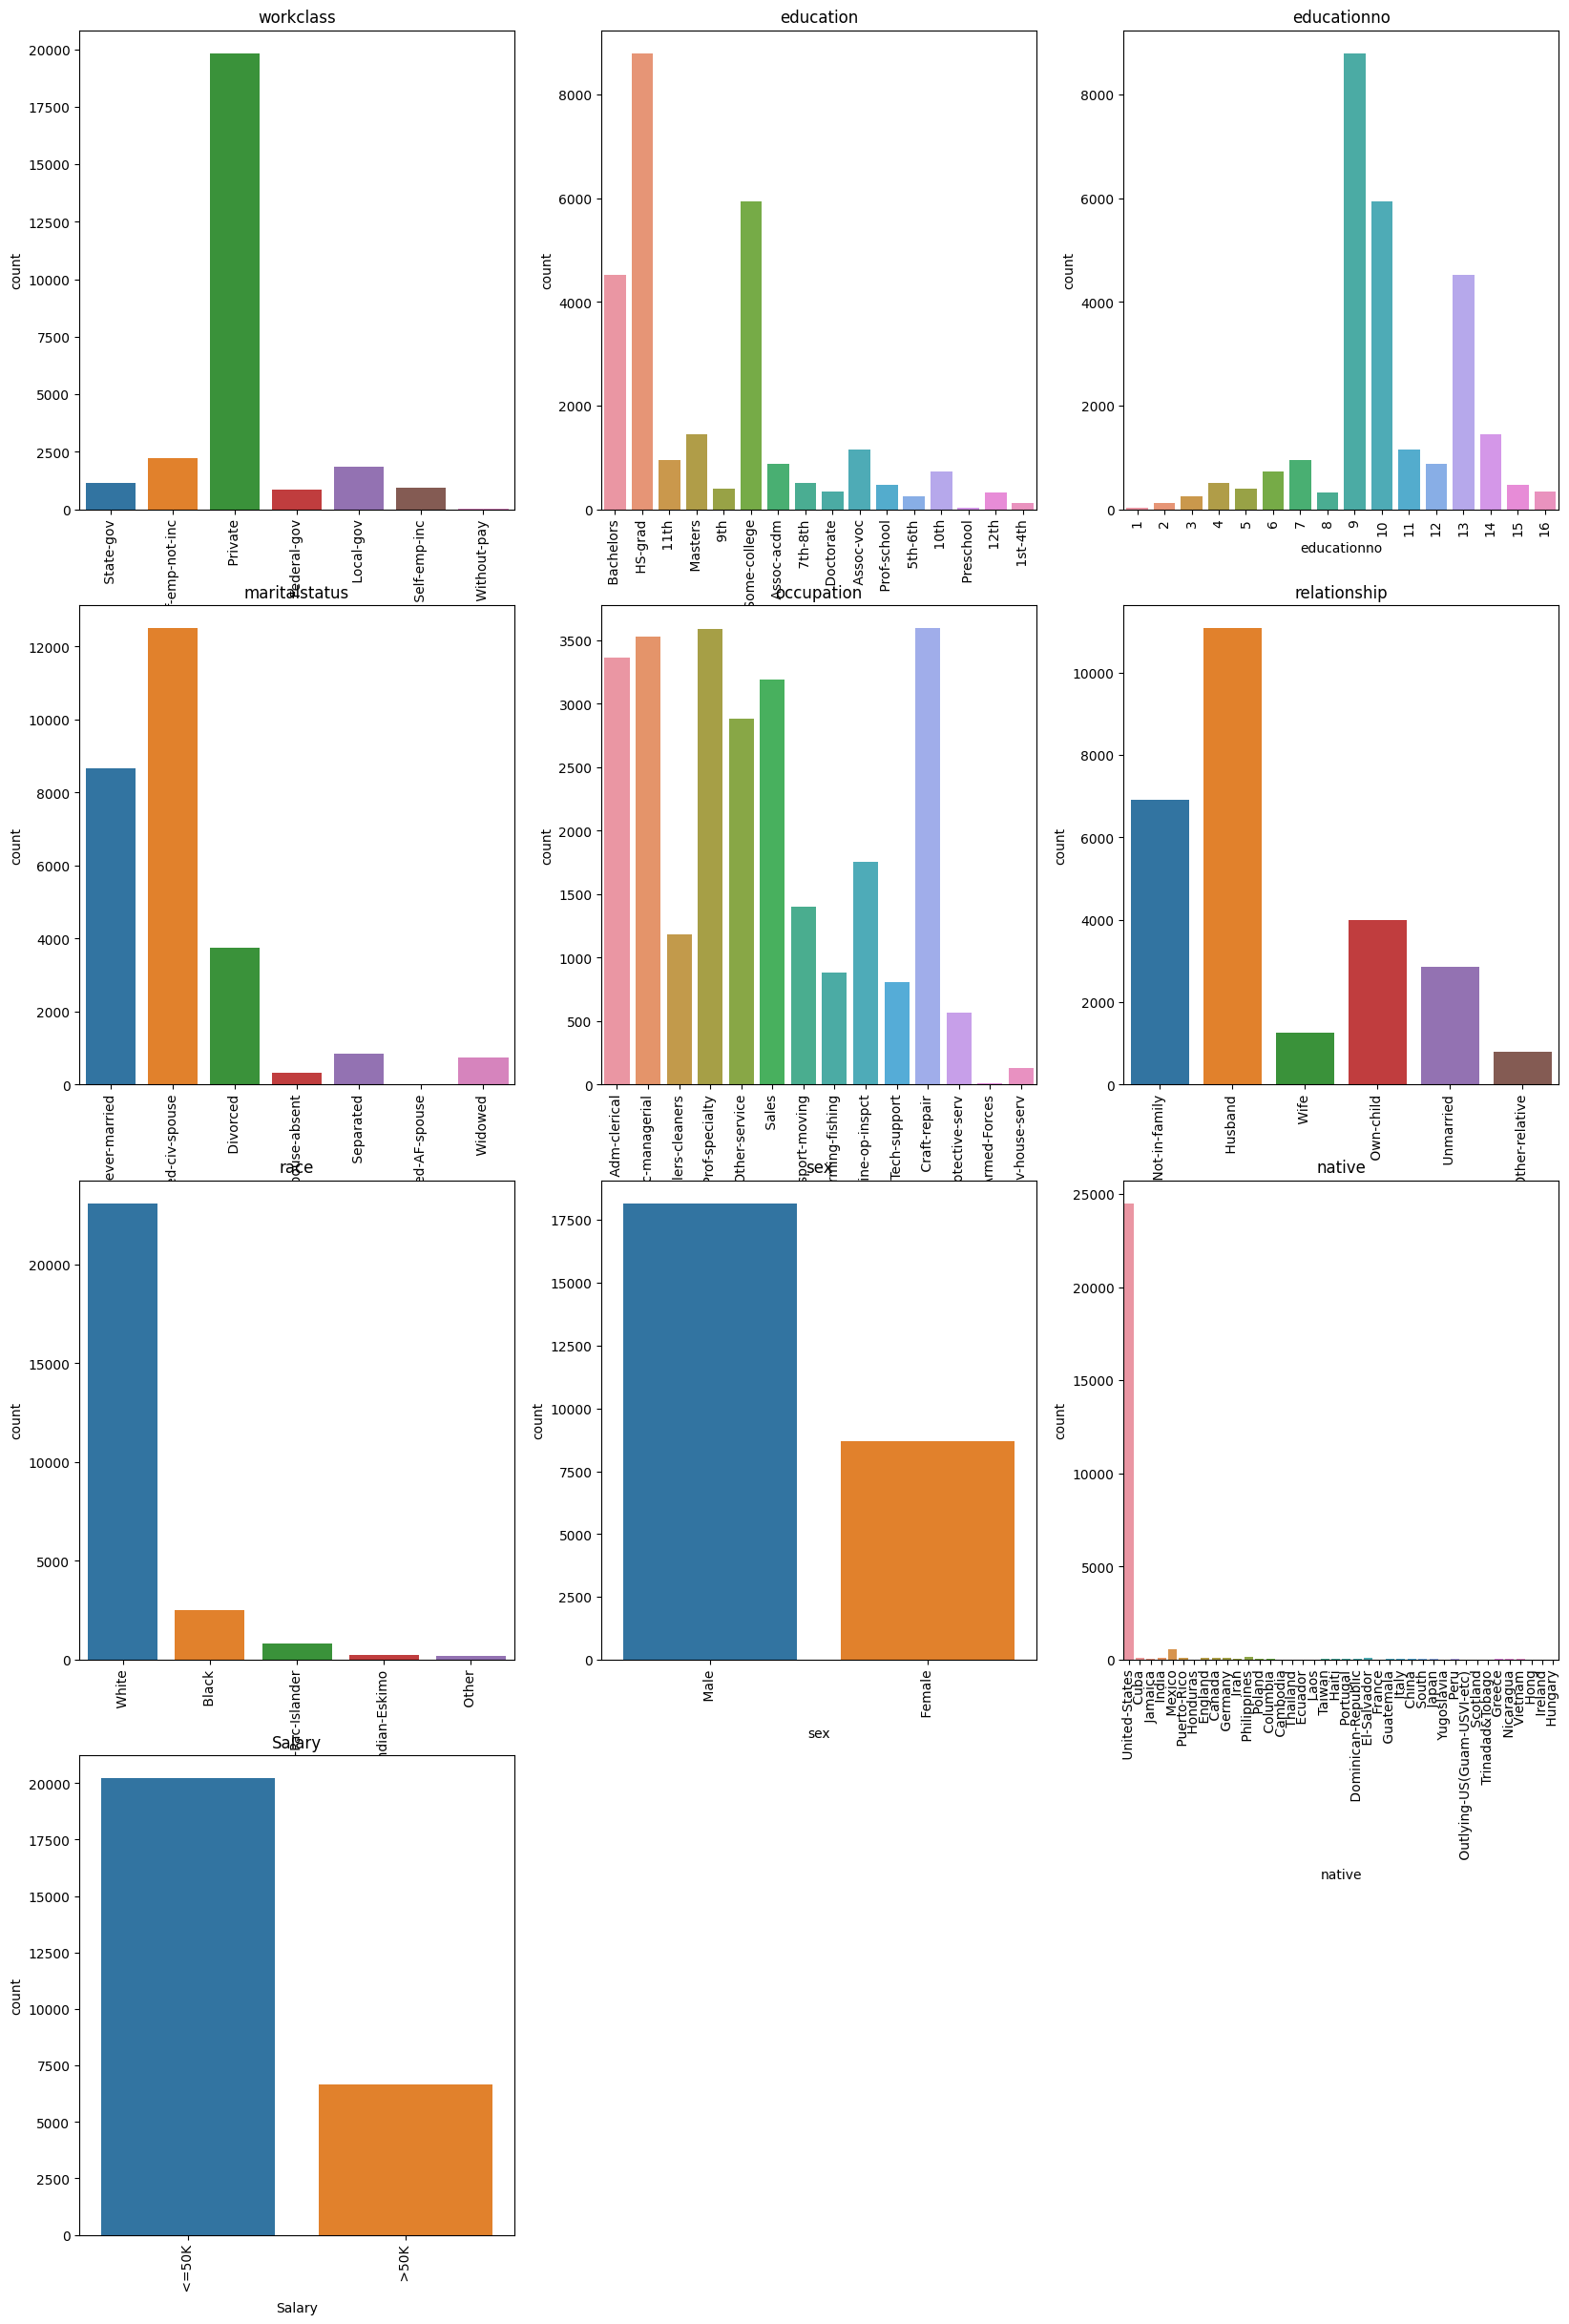

In [16]:
plt.figure(figsize=(20,30))
for i in range(len(cat_columns)):
    plt.subplot(4,3,i+1)
    sns.countplot(data=train_data, x=cat_columns[i])
    plt.title(cat_columns[i])
    plt.xticks(rotation = 90)

In [17]:
train_data['native'] = train_data['native'].str.replace(r"^(.(?<!United-States))*?$", "other")
train_data['workclass'] = train_data['workclass'].str.replace(r"^(.(?<!Private))*?$", "other")
train_data['race'] = train_data['race'].str.replace(r"^(.(?<!White))*?$", "other")

train_data['maritalstatus'] = [w.replace('Married-civ-spouse', 'Married').replace('Married-AF-spouse', 'Married').replace('Married-spouse-absent', 'Married') for w in train_data['maritalstatus']]
train_data['maritalstatus'] = train_data['maritalstatus'].str.replace(r"^(.(?<!Married))*?$", "single")

train_data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\4067387059.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['native'] = train_data['native'].str.replace(r"^(.(?<!United-States))*?$", "other")
C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\4067387059.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['workclass'] = train_data['workclass'].str.replace(r"^(.(?<!Private))*?$", "other")
C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\4067387059.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['race'] = train_data['race'].str.replace(r"^(.(?<!White))*?$", "other")
C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\4067387059.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['maritalstatus'] = train_data['maritalstatus'].str.replace(r"^(.(?<!

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,other,Bachelors,13,single,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,other,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,single,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married,Handlers-cleaners,Husband,other,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married,Prof-specialty,Wife,other,Female,0.0,0.0,40.0,other,<=50K


In [18]:
train_data.drop(['education','educationno','occupation','relationship'], axis=1,inplace=True)
train_data.head()

,age,workclass,maritalstatus,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,other,single,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,other,Married,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,single,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,Married,other,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Married,other,Female,0.0,0.0,40.0,other,<=50K


In [19]:
def PreProcessData(df):
    num_columns = ['age','capitalgain','capitalloss', 'hoursperweek']
    cat_columns = ['workclass', 'education', 'educationno','maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native', 'Salary']
    df['native'] = df['native'].str.replace(r"^(.(?<!United-States))*?$", "other")
    df['workclass'] = df['workclass'].str.replace(r"^(.(?<!Private))*?$", "other")
    df['race'] = df['race'].str.replace(r"^(.(?<!White))*?$", "other")
    df['maritalstatus'] = [w.replace('Married-civ-spouse', 'Married').replace('Married-AF-spouse', 'Married').replace('Married-spouse-absent', 'Married') for w in df['maritalstatus']]
    df['maritalstatus'] = df['maritalstatus'].str.replace(r"^(.(?<!Married))*?$", "single")
    df.drop(['education','educationno','occupation','relationship'], axis=1,inplace=True)

In [20]:
PreProcessData(test_data)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\259884152.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['native'] = df['native'].str.replace(r"^(.(?<!United-States))*?$", "other")
C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\259884152.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['workclass'] = df['workclass'].str.replace(r"^(.(?<!Private))*?$", "other")
C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\259884152.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['race'] = df['race'].str.replace(r"^(.(?<!White))*?$", "other")
C:\Users\Asus\AppData\Local\Temp\ipykernel_11800\259884152.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['maritalstatus'] = df['maritalstatus'].str.replace(r"^(.(?<!Married))*?$", "single")


Removing outliers of test data

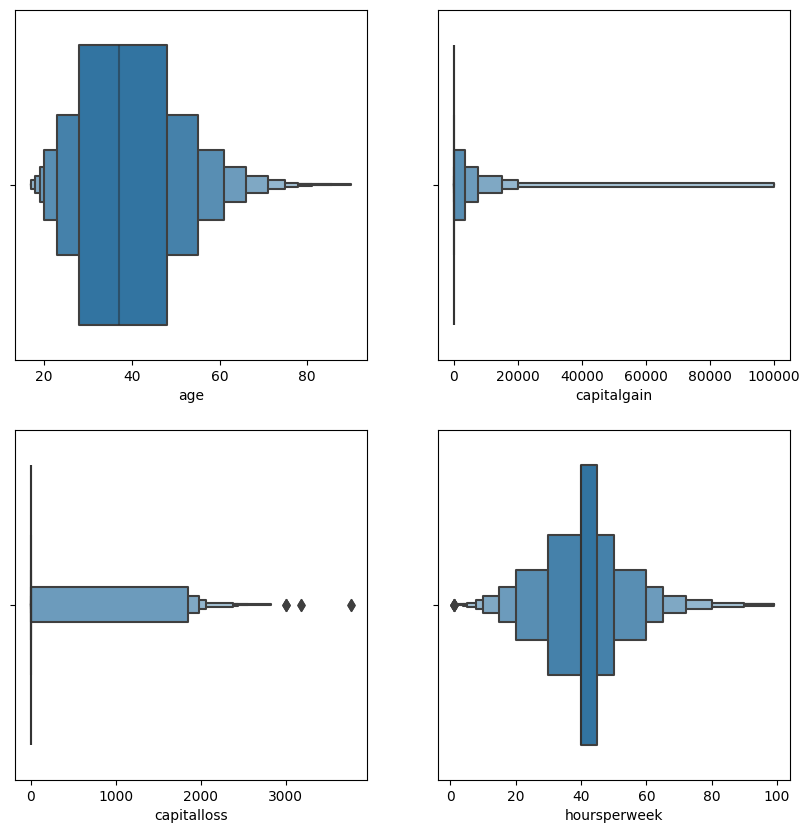

In [21]:
plt.figure(figsize=(10,10))
for i in range(len(num_columns)):
    plt.subplot(2,2,i+1)
    sns.boxenplot(data=test_data,x=num_columns[i])

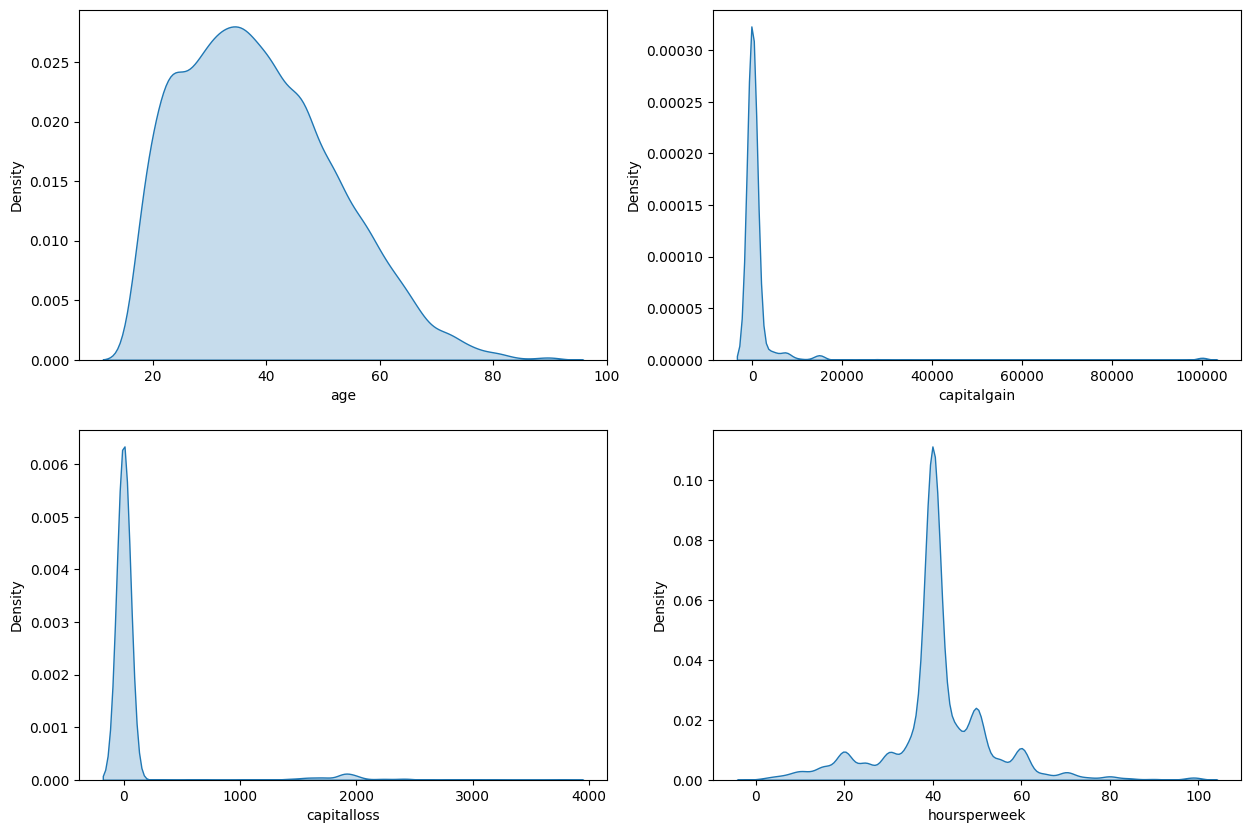

In [22]:
plt.figure(figsize=(15,10))
for i in range(len(num_columns)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=test_data,x=num_columns[i], fill=True)

In [23]:
print(f"Outlier Index of capitalloss column : {test_data[test_data['capitalloss']>2600].index}")

Outlier Index of capitalloss column : Int64Index([1089, 2920, 6706, 7433, 8598, 8731, 9479, 11826, 12102, 12111,
            12989, 14429],
           dtype='int64')


In [24]:
test_data.drop(test_data[test_data['capitalloss']>2600].index, axis=0, inplace=True)

Removing outliers of train data

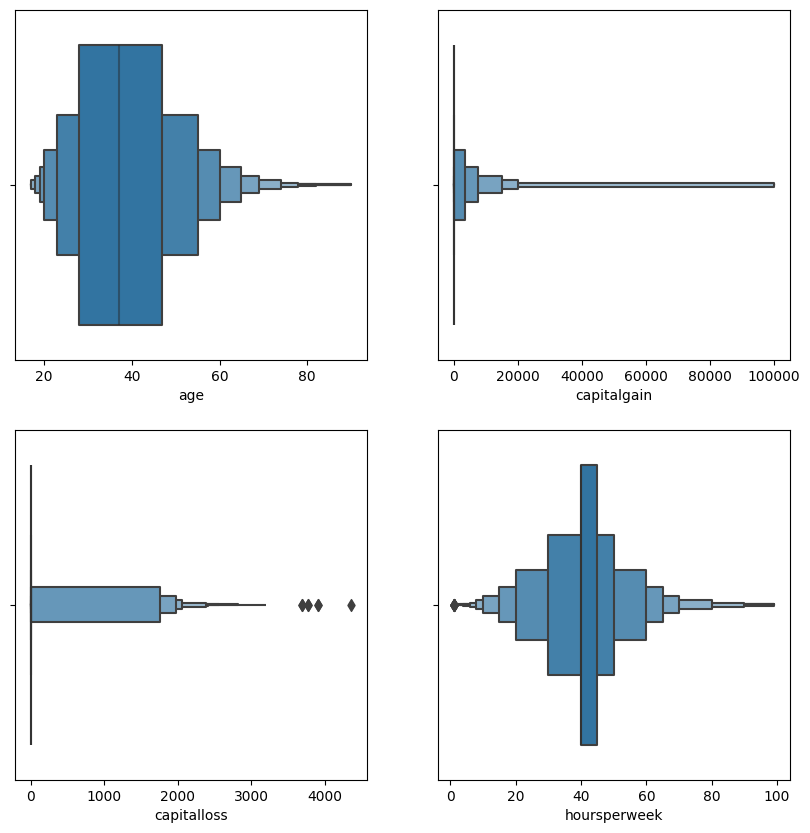

In [25]:
plt.figure(figsize=(10,10))
for i in range(len(num_columns)):
    plt.subplot(2,2,i+1)
    sns.boxenplot(data=train_data,x=num_columns[i])

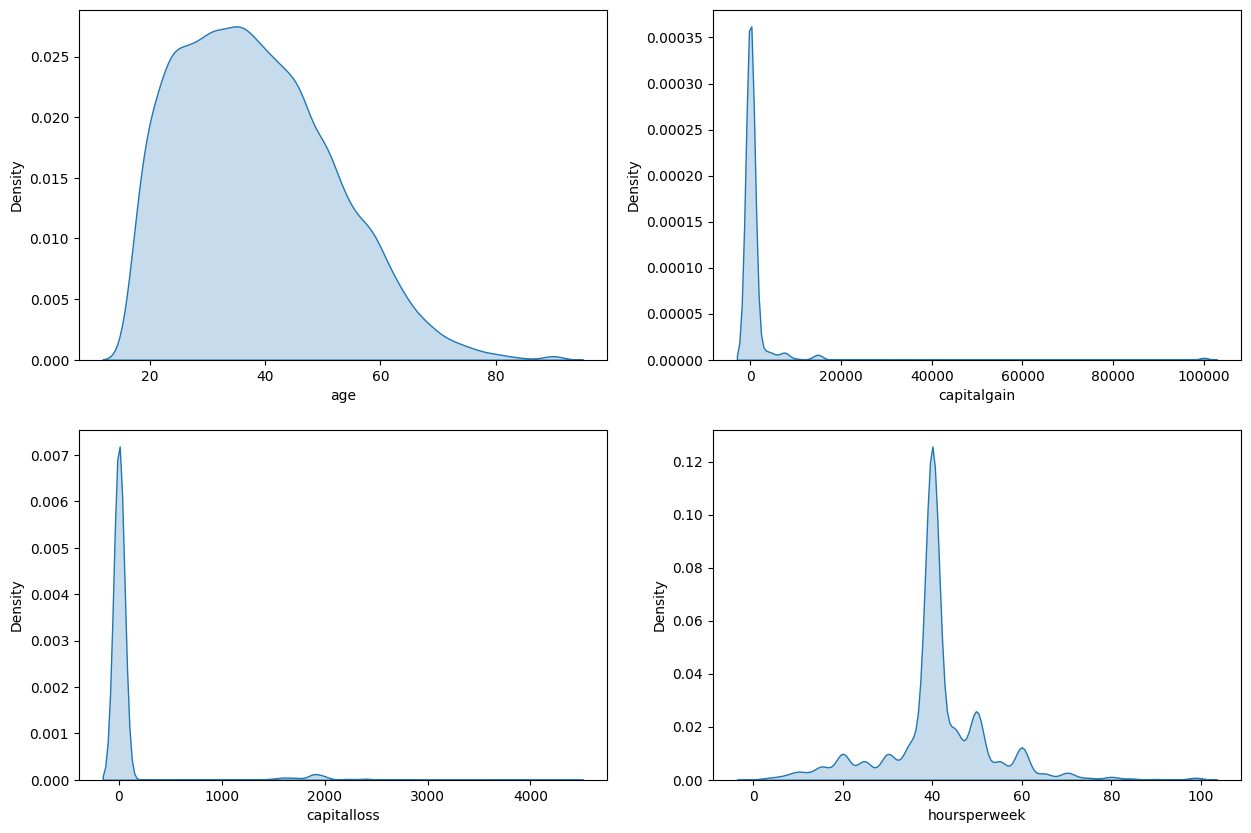

In [26]:
plt.figure(figsize=(15,10))
for i in range(len(num_columns)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=train_data,x=num_columns[i], fill=True)

In [27]:
print(f"Outlier Index of capitalloss column : {train_data[train_data['capitalloss']>3500].index}")

Outlier Index of capitalloss column : Int64Index([11002, 11654, 13661, 14768, 18919, 21363, 22056], dtype='int64')


In [28]:
train_data.drop(train_data[train_data['capitalloss']>3500].index, axis=0, inplace=True)

label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
for col in ['workclass','maritalstatus','race','sex','native','Salary']:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [30]:
array = train_data.values
x_train = array[:,0:9]
y_train = array[:,-1]

array = test_data.values
x_test = array[:,0:9]
y_test = array[:,-1]

## Model building and prediction

In [31]:
clf = SVC(kernel='rbf', gamma=0.0001)
clf.fit(x_train,y_train)

SVC(gamma=0.0001)

In [32]:
y_pred = clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[11287,    68],
       [ 2605,  1088]], dtype=int64)

In [33]:
acc = accuracy_score(y_test,y_pred)*100
print('accuracy: ',acc)

accuracy:  82.23684210526315


## Grid search CV

In [110]:
clf =SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.5,1,0.0001],'C':[1,10,0.1]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

get the best parameter out of grid search

In [ ]:
gsv.best_params_,gsv.best_score_

## train with the best parameters

In [ ]:
clf = SVC(C=15, kernel='rbf', gamma=0.0001)
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(xtest)
confusion_matrix(ytest,y_pred)

In [ ]:
acc = accuracy_score(ytest, y_pred)*100
print('accuracy: ', acc)